In [1]:
import functions as fn
import pandas as pd
from importlib import reload
from tqdm import tqdm
from termcolor import colored
import matplotlib.pyplot as plt
from ooipy.tools import ooiplotlib as ooiplt

In [2]:
df = pd.read_csv('E:/Acer backup 3/internships and jobs/UW/Reader grader and TA/Shima Abadi/Data/ais_2014B_2020B_V2.csv',sep = ',')

df['TIMESTAMP UTC']=df['TIMESTAMP UTC'].astype('datetime64[ns]')


In [3]:
def get_benchmark_data(df,hydrophone_idx,inner_rad,outer_rad,min_duration):
    reload(fn)
    if hydrophone_idx==1:
        hydro='Axial_Base'
    elif hydrophone_idx==2:
        hydro='Central_Caldera'
    elif hydrophone_idx==3:
        hydro='Eastern_Caldera'
    suffix=str(inner_rad)+'_'+ str(outer_rad)+'.csv'
    ais=fn.choose_df(df,hydrophone_idx)
    isolated_ships=fn.get_isolated_ships(ais,inner_rad,outer_rad,min_duration)
    isolated_ais=fn.isolated_ais(ais,isolated_ships,inner_rad)
    
    return isolated_ships,isolated_ais

In [5]:
hydrophone_idx=2
min_duration=20
inner_rad=10
outer_rad=30

In [6]:
ais = fn.choose_df(df,hydrophone_idx)

 Max distance: 168.72 and Min distance: 0.02


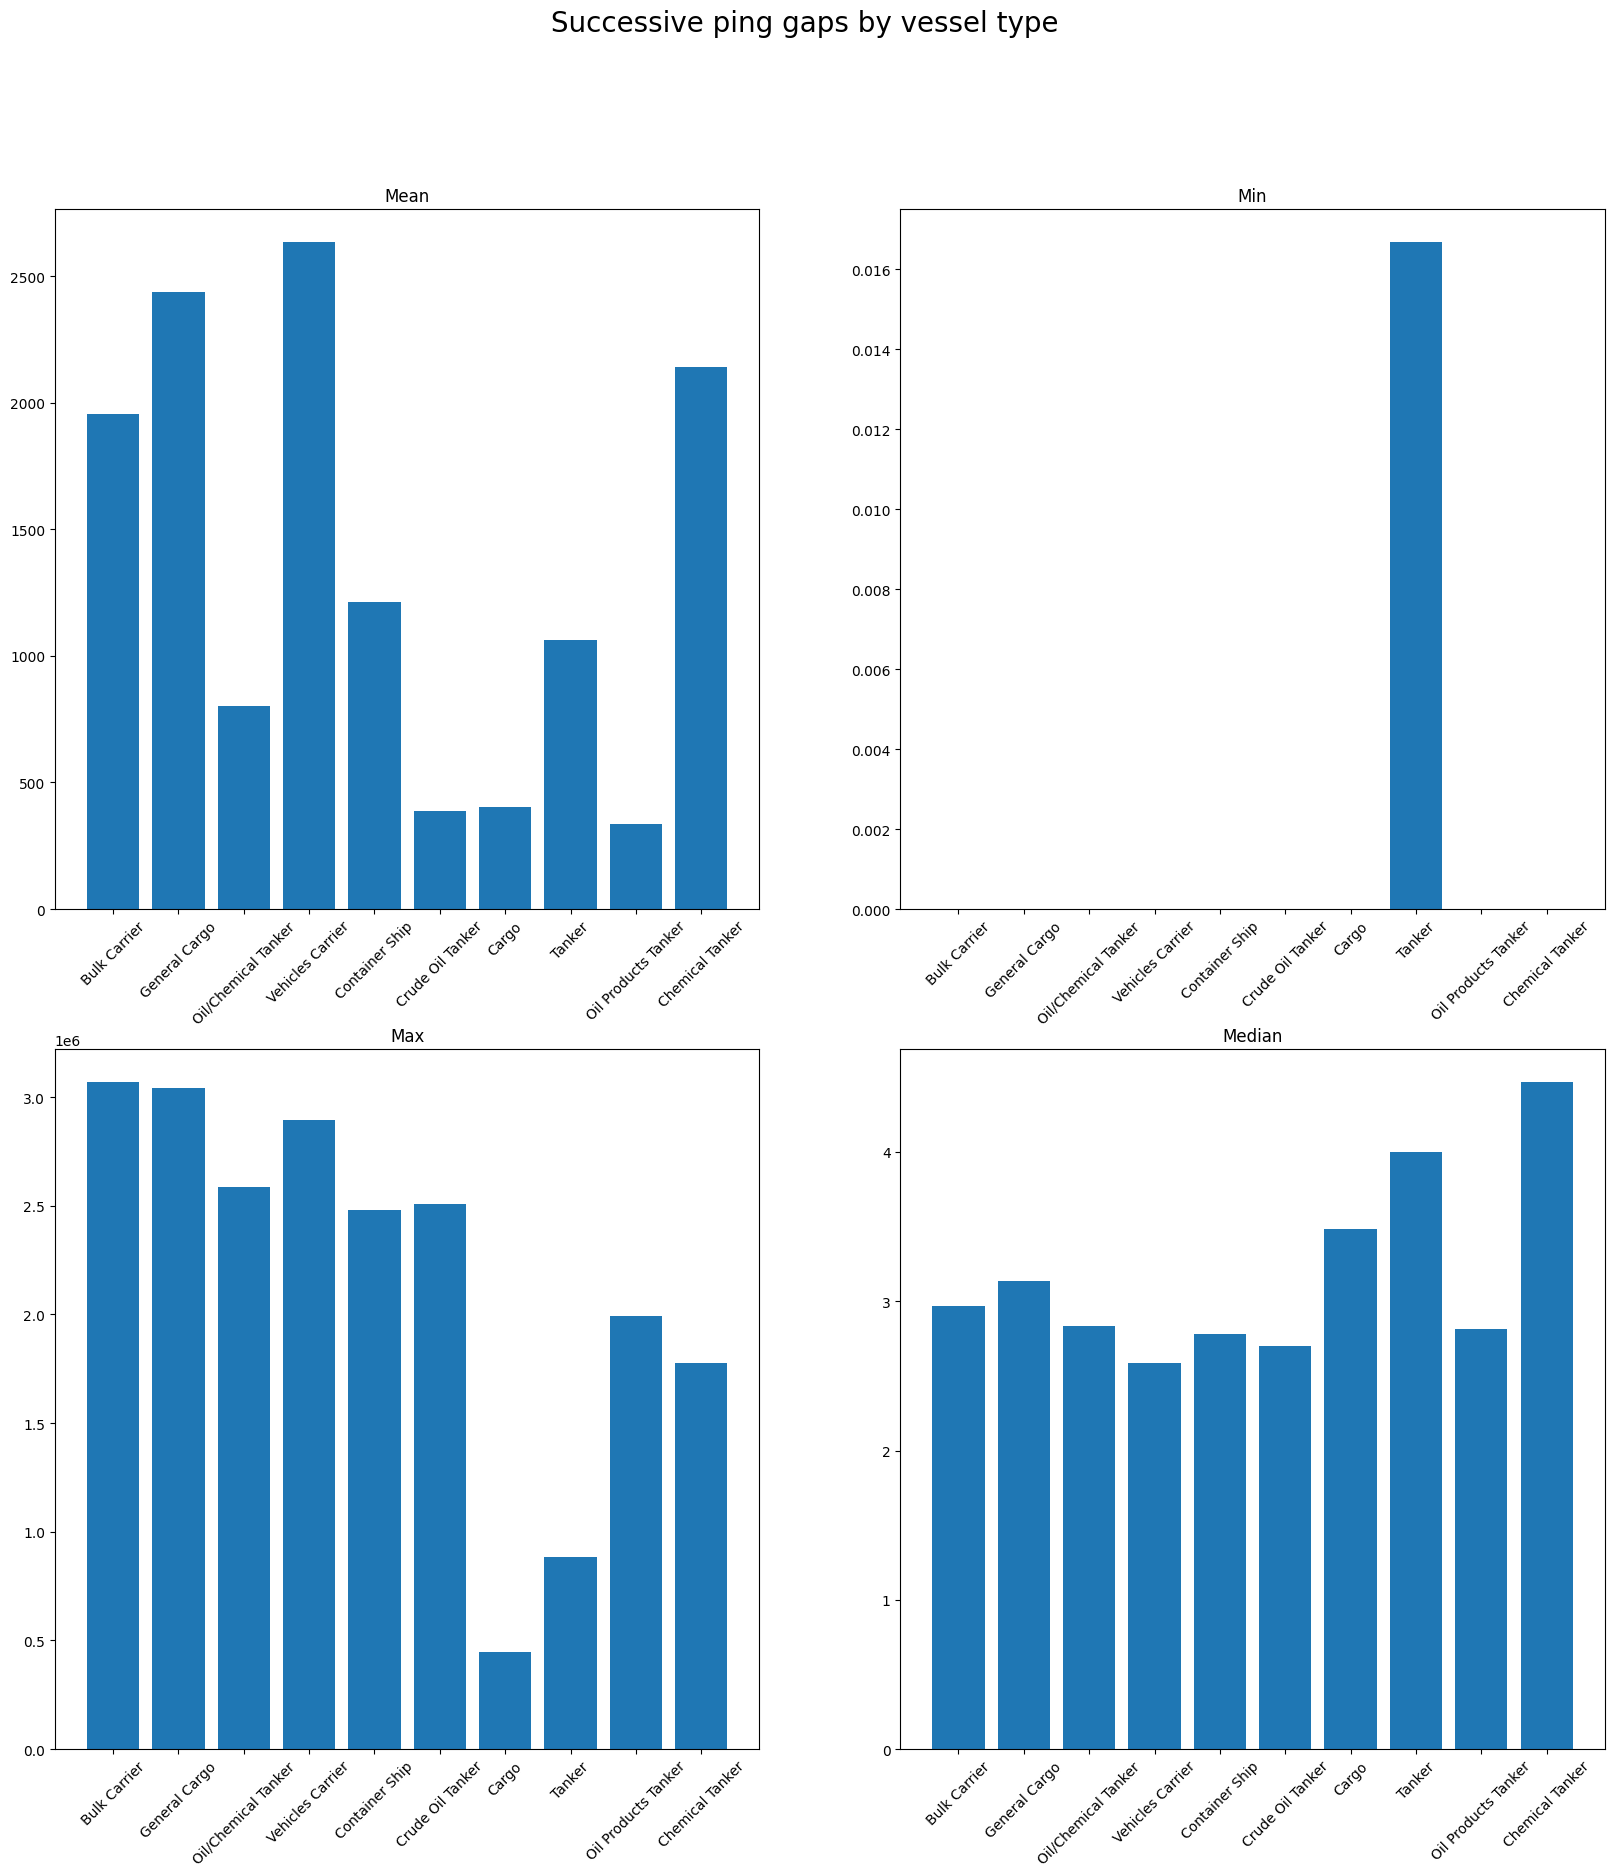

In [8]:

reload(fn)
df['TIMESTAMP UTC']=df['TIMESTAMP UTC'].astype('datetime64[ns]')
ships_pings,vessels_pings= fn.ais_ping_distribution(ais,bar_show=True)

In [9]:
vessels_pings[vessels_pings['VESSEL TYPE']== 'Research/Survey Vessel']

,VESSEL TYPE,distinct count ships,mean_ping_time,min_ping_time,max_ping_time,median_ping_time
47,Research/Survey Vessel,19,201.287444,0.0,1.287155e+06,2.716667


In [10]:
   
   
ais_vessel=ais.groupby(by=['VESSEL TYPE']).agg({'MMSI': ['count',pd.Series.nunique],'SPEED (KNOTSx10)':['mean','median'],'distance(in km)':'mean'}).reset_index()
ais_vessel.columns=['VESSEL TYPE','number ais records','distinct count ships','mean speed','median speed','mean distance']
ais_vessel=ais_vessel.sort_values(by='number ais records',ascending=False)
ais_vessel

,VESSEL TYPE,number ais records,distinct count ships,mean speed,median speed,mean distance
1,Bulk Carrier,1229533,4034,106.933049,114.0,86.857556
10,Crude Oil Tanker,146937,151,68.481145,63.0,78.037042
38,Oil/Chemical Tanker,134970,396,87.093784,111.0,82.818987
70,Vehicles Carrier,97455,355,139.150480,148.0,82.941524
20,General Cargo,84851,405,114.968050,120.0,87.762601
...,...,...,...,...,...,...
14,Dredger,3,3,245.333333,119.0,60.853333
44,Pilot Vessel,1,1,4.000000,4.0,14.380000
6,Cement Carrier,1,1,25.000000,25.0,62.690000
28,LNG Tanker,1,1,128.000000,128.0,117.380000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Bulk Carrier'),
  Text(1, 0, 'General Cargo'),
  Text(2, 0, 'Oil/Chemical Tanker'),
  Text(3, 0, 'Vehicles Carrier'),
  Text(4, 0, 'Container Ship'),
  Text(5, 0, 'Crude Oil Tanker'),
  Text(6, 0, 'Cargo'),
  Text(7, 0, 'Tug'),
  Text(8, 0, 'Tanker'),
  Text(9, 0, 'Oil Products Tanker')])

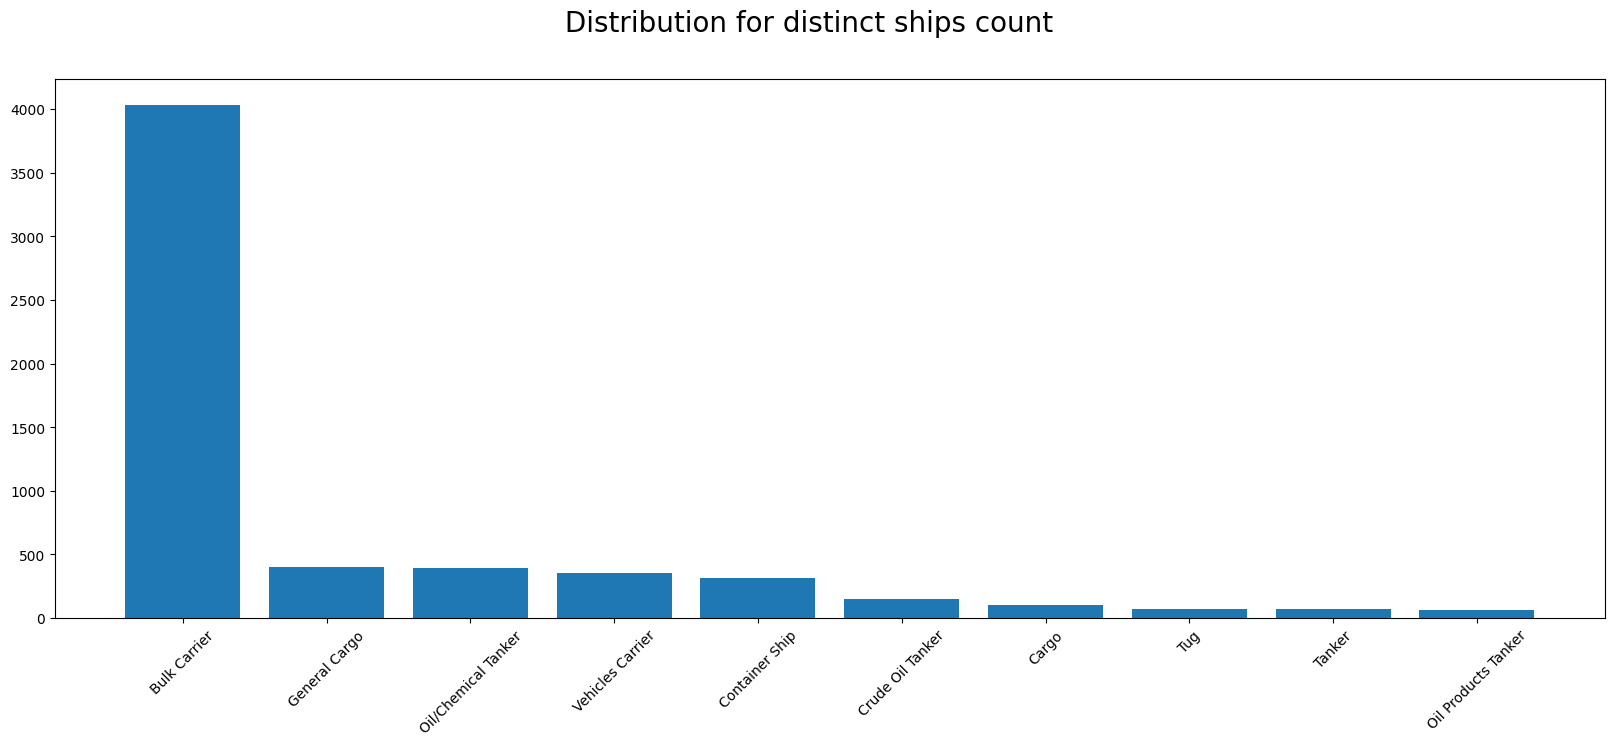

In [11]:
n=10
fig,ax= plt.subplots(1,1,figsize=(20,7))
fig.suptitle(' Distribution for distinct ships count', fontsize=20)
ais_vessel_dist=ais_vessel.sort_values(by='distinct count ships',ascending=False)
plt.bar(ais_vessel_dist['VESSEL TYPE'].iloc[:n],ais_vessel_dist['distinct count ships'].iloc[:n])
plt.xticks(rotation = 45)


### EDA for isolated ships

In [12]:
hydrophone_idx=2
min_duration=10
inner_rad=10
outer_rad=30
isolated_ships, isolated_ais=get_benchmark_data(df,hydrophone_idx,inner_rad,outer_rad,min_duration)

 Max distance: 168.72 and Min distance: 0.02


100%|████████████████████████████████████████████████████████████████████████████████| 666/666 [00:15<00:00, 42.18it/s]


In [13]:
isolated_ais.head()

,MMSI,SHIPNAME,VESSEL TYPE,SPEED (KNOTSx10),COURSE,HEADING,TIMESTAMP UTC,LENGTH,Year,ship_Loc,LAT,LON,distance(in km),central_caldera_Loc,isolated_ship_idx
198425,205700000,LA STELLA,Bulk Carrier,143,78,79,2016-12-23 12:32:31,199.98,2016,"(46.01589, -130.077)",46.01589,-130.0770,8.59,"(45.9549, -130.0089)",0
198427,205700000,LA STELLA,Bulk Carrier,139,78,78,2016-12-23 12:38:48,199.98,2016,"(46.02079, -130.0423)",46.02079,-130.0423,7.77,"(45.9549, -130.0089)",0
198432,205700000,LA STELLA,Bulk Carrier,143,77,78,2016-12-23 12:44:18,199.98,2016,"(46.02562, -130.0121)",46.02562,-130.0121,7.86,"(45.9549, -130.0089)",0
198434,205700000,LA STELLA,Bulk Carrier,142,76,78,2016-12-23 12:46:11,199.98,2016,"(46.02739, -130.0015)",46.02739,-130.0015,8.08,"(45.9549, -130.0089)",0
198441,205700000,LA STELLA,Bulk Carrier,148,76,78,2016-12-23 12:52:06,199.98,2016,"(46.03278, -129.9684)",46.03278,-129.9684,9.21,"(45.9549, -130.0089)",0


In [14]:
isolated_ais[isolated_ais['isolated_ship_idx']==104]


,MMSI,SHIPNAME,VESSEL TYPE,SPEED (KNOTSx10),COURSE,HEADING,TIMESTAMP UTC,LENGTH,Year,ship_Loc,LAT,LON,distance(in km),central_caldera_Loc,isolated_ship_idx
36280,352496000,NEW CENTURY 2,Vehicles Carrier,172,252,254,2015-07-08 18:49:13,199.99,2015,"(46.03207, -129.9475)",46.03207,-129.9475,9.81,"(45.9549, -130.0089)",104
36281,352496000,NEW CENTURY 2,Vehicles Carrier,170,259,262,2015-07-08 18:52:56,199.99,2015,"(46.02767, -129.972)",46.02767,-129.9720,8.58,"(45.9549, -130.0089)",104
36282,352496000,NEW CENTURY 2,Vehicles Carrier,170,262,264,2015-07-08 18:57:56,199.99,2015,"(46.0246, -130.0056)",46.02460,-130.0056,7.75,"(45.9549, -130.0089)",104
36283,352496000,NEW CENTURY 2,Vehicles Carrier,170,262,264,2015-07-08 19:01:20,199.99,2015,"(46.0226, -130.0285)",46.02260,-130.0285,7.68,"(45.9549, -130.0089)",104
36284,352496000,NEW CENTURY 2,Vehicles Carrier,170,262,264,2015-07-08 19:03:26,199.99,2015,"(46.02135, -130.0427)",46.02135,-130.0427,7.84,"(45.9549, -130.0089)",104
36285,352496000,NEW CENTURY 2,Vehicles Carrier,170,263,264,2015-07-08 19:10:20,199.99,2015,"(46.01753, -130.0891)",46.01753,-130.0891,9.33,"(45.9549, -130.0089)",104


In [16]:
temp=ais[(ais['TIMESTAMP UTC']>='2015-07-08 18:49:13') & (ais['TIMESTAMP UTC']<='2015-07-08 19:10:20') & (ais['distance(in km)']<inner_rad)]
temp

,MMSI,SHIPNAME,VESSEL TYPE,SPEED (KNOTSx10),COURSE,HEADING,TIMESTAMP UTC,LENGTH,Year,ship_Loc,LAT,LON,distance(in km),central_caldera_Loc
36280,352496000,NEW CENTURY 2,Vehicles Carrier,172,252,254,2015-07-08 18:49:13,199.99,2015,"(46.03207, -129.9475)",46.03207,-129.9475,9.81,"(45.9549, -130.0089)"
36281,352496000,NEW CENTURY 2,Vehicles Carrier,170,259,262,2015-07-08 18:52:56,199.99,2015,"(46.02767, -129.972)",46.02767,-129.9720,8.58,"(45.9549, -130.0089)"
36282,352496000,NEW CENTURY 2,Vehicles Carrier,170,262,264,2015-07-08 18:57:56,199.99,2015,"(46.0246, -130.0056)",46.02460,-130.0056,7.75,"(45.9549, -130.0089)"
36283,352496000,NEW CENTURY 2,Vehicles Carrier,170,262,264,2015-07-08 19:01:20,199.99,2015,"(46.0226, -130.0285)",46.02260,-130.0285,7.68,"(45.9549, -130.0089)"
36284,352496000,NEW CENTURY 2,Vehicles Carrier,170,262,264,2015-07-08 19:03:26,199.99,2015,"(46.02135, -130.0427)",46.02135,-130.0427,7.84,"(45.9549, -130.0089)"
36285,352496000,NEW CENTURY 2,Vehicles Carrier,170,263,264,2015-07-08 19:10:20,199.99,2015,"(46.01753, -130.0891)",46.01753,-130.0891,9.33,"(45.9549, -130.0089)"


In [17]:
def isolated_ships_describe(isolated_ships, isolated_ais):
    ais_vessel=isolated_ais.groupby(by=['VESSEL TYPE']).agg({'MMSI': ['count',pd.Series.nunique],'isolated_ship_idx':pd.Series.nunique,'SPEED (KNOTSx10)':['mean','median'],'distance(in km)':'mean'}).reset_index()
    ais_vessel.columns=['VESSEL TYPE','number ais records','distinct count ships','distinct instances','mean speed','median speed','mean distance']
    ais_vessel=ais_vessel.sort_values(by='distinct count ships',ascending=False)
    isolated_vessel=isolated_ships.groupby(by=['VESSEL TYPE']).agg({'len_of_recording':['mean','median']}).reset_index()
    isolated_vessel.columns=['VESSEL TYPE','mean len_of_recording','median len_of_recording']
    df_final=ais_vessel.merge(isolated_vessel,how='left',on='VESSEL TYPE')
    return df_final





In [18]:

vessel_summary=isolated_ships_describe(isolated_ships, isolated_ais)
vessel_summary

,VESSEL TYPE,number ais records,distinct count ships,distinct instances,mean speed,median speed,mean distance,mean len_of_recording,median len_of_recording
0,Bulk Carrier,1637,171,192,90.428222,106.0,7.034551,58.337347,36.166667
1,Vehicles Carrier,197,21,22,122.015228,144.0,6.590305,26.696296,25.991667
2,Container Ship,790,15,92,216.268354,224.0,7.169342,20.004301,20.316667
3,Oil/Chemical Tanker,97,14,17,94.103093,118.0,6.909278,75.143750,30.741667
4,General Cargo,124,13,13,69.298387,104.0,6.951210,25.368056,20.750000
5,Tug,342,9,30,89.251462,87.0,7.126111,46.712857,39.983333
6,Research/Survey Vessel,16938,6,211,13.978097,4.0,3.702245,393.000869,123.000000
7,Cargo,31,5,5,109.967742,115.0,7.736129,27.490000,25.483333
8,Crude Oil Tanker,168,5,5,56.577381,36.5,7.973929,154.116667,154.116667
9,Fishing Vessel,126,4,8,43.539683,30.0,7.994365,53.051667,24.325000


Text(0.5, 1.0, 'distinct instances')

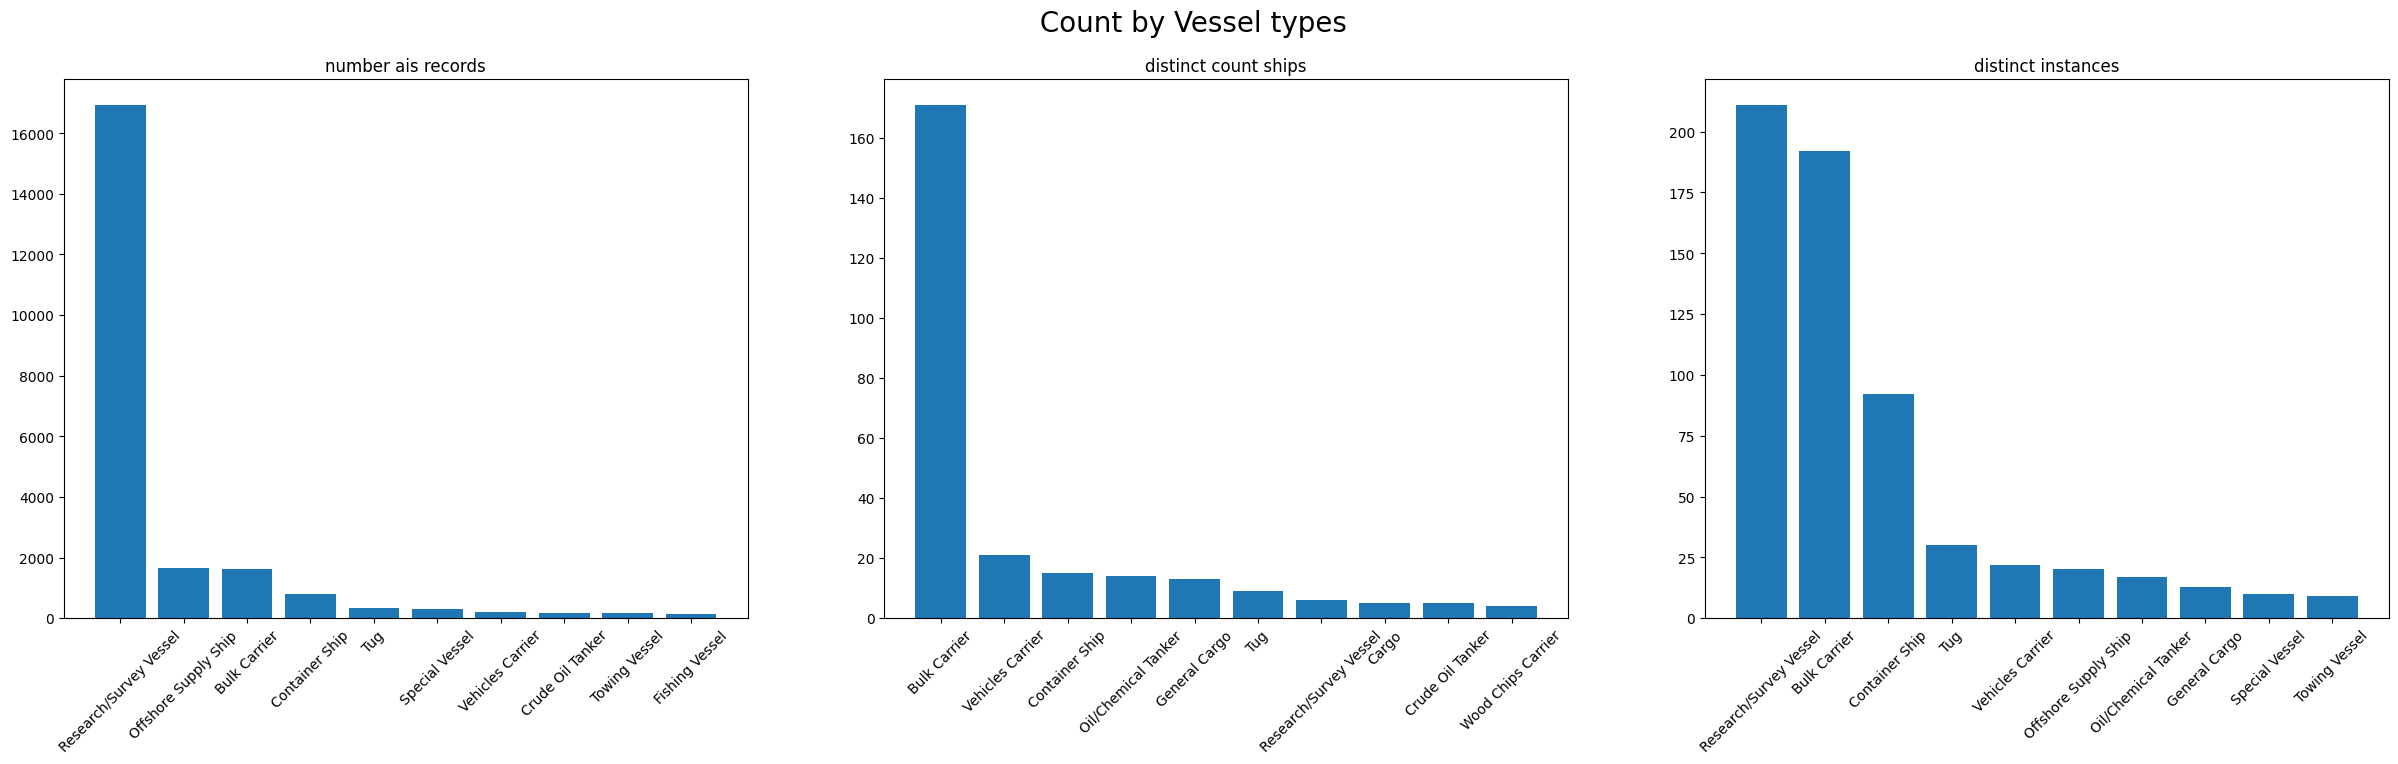

In [21]:
n=10
ais_vessel_dist=vessel_summary.copy()
fig,ax= plt.subplots(1,3,figsize=(30,7))
fig.suptitle(' Count by Vessel types', fontsize=20)
ais_vessel_dist=ais_vessel_dist.sort_values(by='number ais records',ascending=False)
ax[0].bar(ais_vessel_dist['VESSEL TYPE'].iloc[:n],ais_vessel_dist['number ais records'].iloc[:n])
ax[0].set_xticklabels(ais_vessel_dist['VESSEL TYPE'].unique()[:n],rotation = 45)
ax[0].set_title('number ais records')
ais_vessel_dist=ais_vessel_dist.sort_values(by='distinct count ships',ascending=False)
ax[1].bar(ais_vessel_dist['VESSEL TYPE'].iloc[:n],ais_vessel_dist['distinct count ships'].iloc[:n])
ax[1].set_xticklabels(ais_vessel_dist['VESSEL TYPE'].unique()[:n],rotation = 45)
ax[1].set_title('distinct count ships')
ais_vessel_dist=ais_vessel_dist.sort_values(by='distinct instances',ascending=False)
ax[2].bar(ais_vessel_dist['VESSEL TYPE'].iloc[:n],ais_vessel_dist['distinct instances'].iloc[:n])
ax[2].set_xticklabels(ais_vessel_dist['VESSEL TYPE'].unique()[:n],rotation = 45)
ax[2].set_title('distinct instances')
